# Libraries Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import math as mt
%matplotlib inline  
import matplotlib.pyplot as plt
import datetime as dt

from scipy.stats import pearsonr
from scipy.stats import spearmanr

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# IMPORTING THE DATA SET
#### Data set for the Transaction

In [2]:
transaction=pd.read_csv('Customers transaction.csv',header=0)

In [3]:
transaction.head()
transaction.count()

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
online_order               19640
order_status               20000
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 20000
standard_cost              19803
product_first_sold_date    19803
dtype: int64

### Data Set for the Customers Demograhic

In [4]:
customers_demo=pd.read_csv('customers demo.csv',header=0)
customers_demo.head() 
dob=pd.read_csv('DOB.csv',header=0)

###### Whenever the column "Unnamed: 10" Shows up,run this

In [7]:
customers_demo=pd.read_csv('customers demo.csv',header=0)
customers_demo.head() 
del customers_demo['Unnamed: 10']

### Data Set for New Customers List

In [8]:
New_customer_list=pd.read_csv('Customer list.csv',header=1)

## Data Set for Customers Address

In [5]:
Customers_address=pd.read_csv('customers address.csv',header=0)

# Cleaning the Data Set in Preparation for Analysis
## Transaction Data Set

In [6]:
trant=transaction[['transaction_id','product_id','customer_id','transaction_date','online_order','order_status','brand','product_line','product_class','product_size','list_price','standard_cost','product_first_sold_date']]
trant.isnull().any()
clean_tansaction=trant.dropna()
clean_tansaction.isnull().any()
clean_tansaction.shape

(19445, 13)

## Customers Demographic

#### Cleaning the Gender Column

In [7]:
Gender=customers_demo['gender'].str.replace('Femal', 'Female')
gen=Gender.str.replace('F','Female')
Sex=gen.str.replace('Femaleemalee','Female')
t=Sex.str.replace('U','Unknown')
y=t.str.replace('M','Male')
b=y.str.replace('Maleale','Male')
Gender=b.str.replace('Femaleemale','Female')

In [13]:
customers_demo.isnull().any()
clean_customers_demo=customers_demo.dropna()
clean_customers_demo.isnull().any()
clean_customers_demo.count()
del clean_customers_demo['gender']
del clean_customers_demo['DOB']

## Customers Address

In [14]:
address=Customers_address[['customer_id','postcode','property_valuation','state','country','address']]
address.isnull().any()
address.shape

(3999, 6)

# EXPLORING/ UNDERSTANDING THE DATA SET
### Customers Demographic

###### Converting DOB to Age

In [16]:
birth=pd.to_datetime(dob['DOB'])
from datetime import date
def calculate_age(birthdate):
    today=date.today()
    age=today.year-birthdate.year-((today.month,today.day)<(birthdate.month,birthdate.day))
    return age
clean_customers_demo['Age']=birth.apply(calculate_age)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


###### Dealing with the datetime 

In [17]:
clean_customers_demo['Year']=birth.dt.year

#clean_customers_demo['Year'].value_counts()
#clean_customers_demo['Year'].value_counts().sort_index()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### Grouping the Age into different Categories

In [18]:
clean_customers_demo['Age_Category']=pd.cut(clean_customers_demo.Age,bins=[0,30,65,100],labels=['Youth','Midddle_Age','Old_Age'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


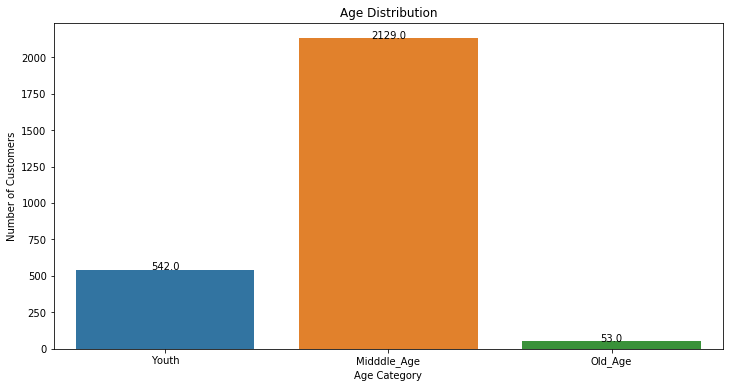

In [18]:
plt.figure(figsize=(12,6))
splot=sns.countplot(x='Age_Category',data=clean_customers_demo)

## Annotating the Bar
for p in splot.patches:
    splot. annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, 3),  
                   textcoords = 'offset points')
    plt.title('Age Distribution')
    plt.xlabel('Age Category')
    plt.ylabel('Number of Customers')

###### Exploring other Variable

In [18]:
clean_customers_demo.head()

,customer_id,first_name,last_name,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_Category
0,1,Laraine,Medendorp,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,Old_Age
1,2,Eli,Bockman,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,Midddle_Age
2,3,Arlin,Dearle,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0,Old_Age
8,9,Mala,Lind,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,47.0,Midddle_Age
9,10,Fiorenze,Birdall,49,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,31.0,Midddle_Age


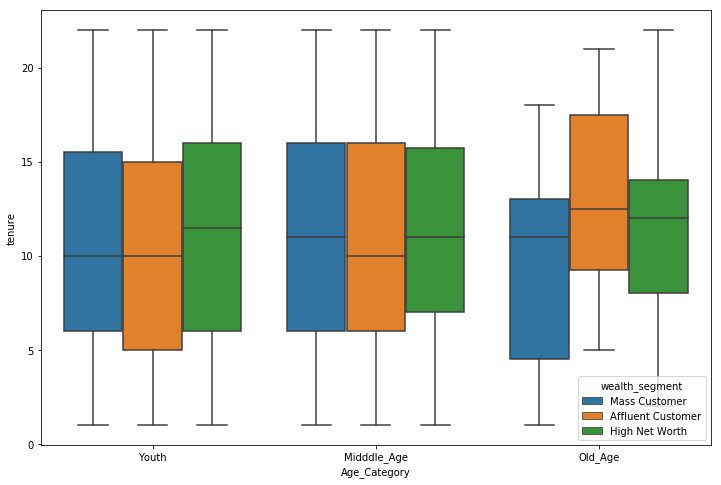

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Age_Category',y='tenure',hue='wealth_segment', data=clean_customers_demo)

Text(0, 0.5, 'Tenure')

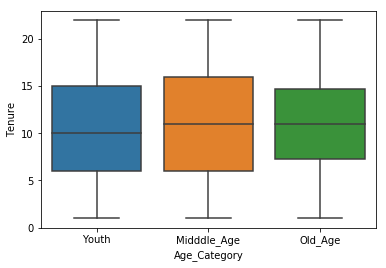

In [31]:
sns.boxplot(x='Age_Category',y='tenure',data=clean_customers_demo)
plt.ylabel('Tenure')

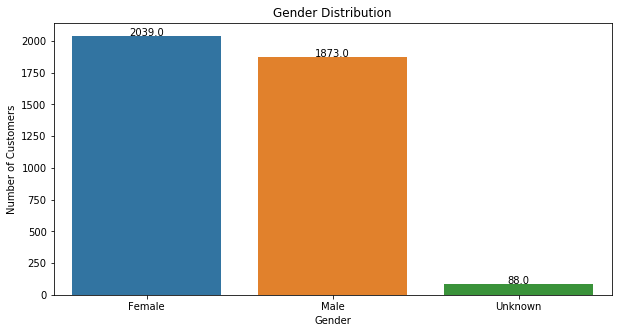

In [19]:
plt.figure(figsize=(10,5))
splot=sns.countplot(x=Gender)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, 3),  
                   textcoords = 'offset points')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Number of Customers')

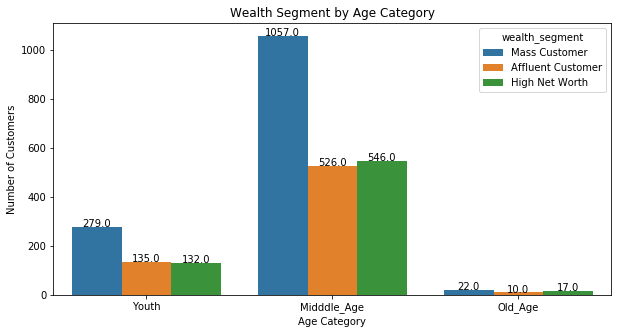

In [20]:
plt.figure(figsize=(10,5))
splot=sns.countplot(x='Age_Category',hue='wealth_segment', data=clean_customers_demo)


## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, 3),  
                   textcoords = 'offset points')
    plt.title('Wealth Segment by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Number of Customers')

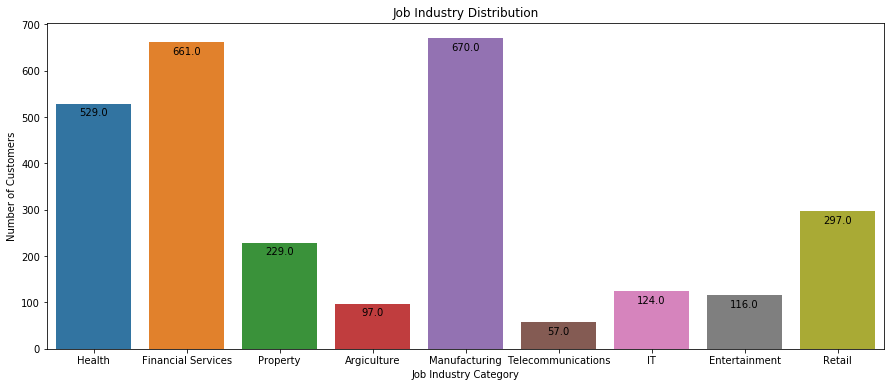

In [21]:
plt.figure(figsize=(15,6))
splot=sns.countplot(x='job_industry_category',data=clean_customers_demo)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -9),  
                   textcoords = 'offset points')
    plt.title('Job Industry Distribution')
    plt.xlabel('Job Industry Category')
    plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

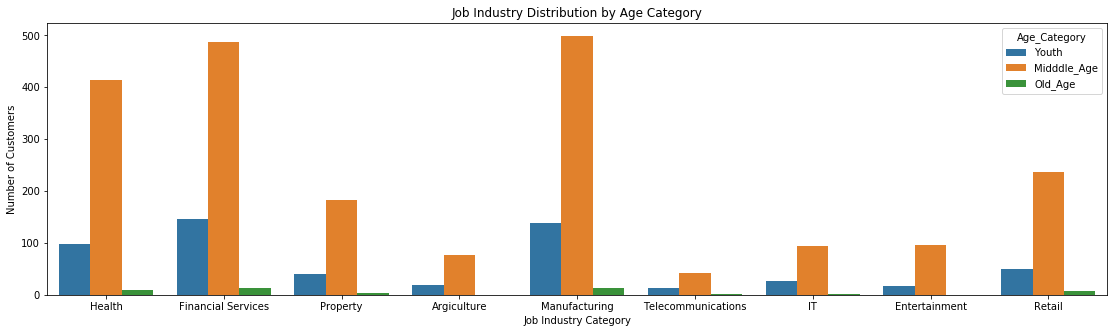

In [91]:
plt.figure(figsize=(19,5))
sns.countplot(x='job_industry_category',hue='Age_Category',data=clean_customers_demo)

plt.title('Job Industry Distribution by Age Category')
plt.xlabel('Job Industry Category')
plt.ylabel('Number of Customers')

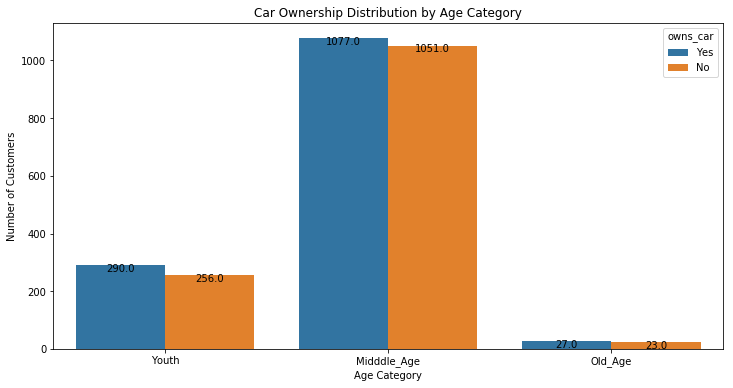

In [61]:
plt.figure(figsize=(12,6))
splot=sns.countplot(x='Age_Category',hue='owns_car',data=clean_customers_demo)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -3),  
                   textcoords = 'offset points')
    plt.title('Car Ownership Distribution by Age Category')
    plt.xlabel('Age Category') 
    plt.ylabel('Number of Customers')

count    2780.000000
mean       49.449640
std        28.765195
min         0.000000
25%        25.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

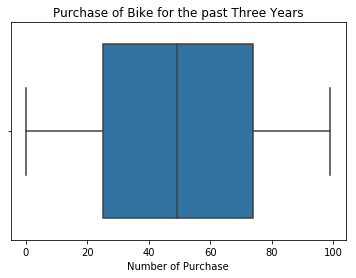

In [145]:
sns.boxplot(x=clean_customers_demo['past_3_years_bike_related_purchases'])
plt.title('Purchase of Bike for the past Three Years')
plt.xlabel('Number of Purchase')
clean_customers_demo['past_3_years_bike_related_purchases'].describe()

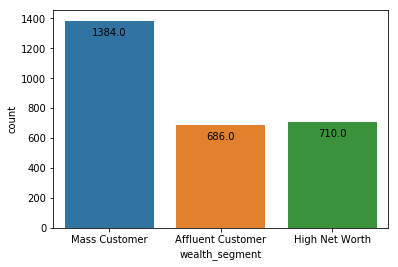

In [123]:
splot=sns.countplot(x='wealth_segment',data=clean_customers_demo)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -12),  
                   textcoords = 'offset points')

count    2780.000000
mean       10.703957
std         5.674807
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        22.000000
Name: tenure, dtype: float64

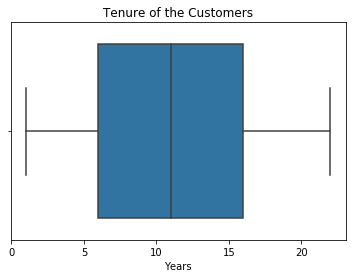

In [92]:
sns.boxplot(x=clean_customers_demo['tenure'])
plt.title('Tenure of the Customers')
plt.xlabel('Years')
clean_customers_demo['tenure'].describe()

In [70]:
spearmanr(clean_customers_demo['past_3_years_bike_related_purchases'],clean_customers_demo['tenure'])

SpearmanrResult(correlation=-0.017338981761671417, pvalue=0.3607864274011837)

In [172]:
pearsonr(clean_customers_demo['past_3_years_bike_related_purchases'],clean_customers_demo['tenure'])

(-0.019881483521419756, 0.2946858950917255)

In [27]:
clean_customers_demo.corr()

,customer_id,past_3_years_bike_related_purchases,tenure,Age,Year
customer_id,1.000000,-0.002851,-0.020991,-0.002104,0.003614
past_3_years_bike_related_purchases,-0.002851,1.000000,-0.019881,-0.000170,-0.000163
tenure,-0.020991,-0.019881,1.000000,0.031058,-0.030176
Age,-0.002104,-0.000170,0.031058,1.000000,-0.999435
Year,0.003614,-0.000163,-0.030176,-0.999435,1.000000


In [31]:
clean_customers_demo.to_excel('exported demography.xlsx',header=True,index=False)

### Transaction

In [27]:
clean_tansaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,10-01-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


##### Distributing the product into high and low value

count    19445.000000
mean      1107.337193
std        582.662400
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

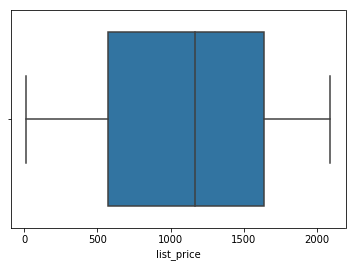

In [177]:
sns.boxplot(x=clean_tansaction.list_price)
clean_tansaction.list_price.describe()

In [19]:
High_valued=clean_tansaction.list_price>=1107
High_valued_product=clean_tansaction[High_valued]

Low_valued=clean_tansaction.list_price<1107
Low_valued_product=clean_tansaction[Low_valued]
High_valued_product

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,10-01-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,03-08-17,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
7,8,15,2459,7/15/2017,False,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
9,10,12,3262,8/30/2017,True,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0
13,14,16,2717,09-10-17,False,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586.0
14,15,12,247,06-11-17,False,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,38193.0
15,16,3,2961,10-10-17,False,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,37873.0


##### Exploring other varibles

In [101]:
clean_tansaction.corr()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date
transaction_id,1.000000,-0.011633,0.002779,-0.006391,-0.002293,0.004391
product_id,-0.011633,1.000000,0.003369,0.090085,0.038830,-0.054155
customer_id,0.002779,0.003369,1.000000,0.011671,0.006870,-0.002306
list_price,-0.006391,0.090085,0.011671,1.000000,0.551666,0.059164
standard_cost,-0.002293,0.038830,0.006870,0.551666,1.000000,0.030714
product_first_sold_date,0.004391,-0.054155,-0.002306,0.059164,0.030714,1.000000


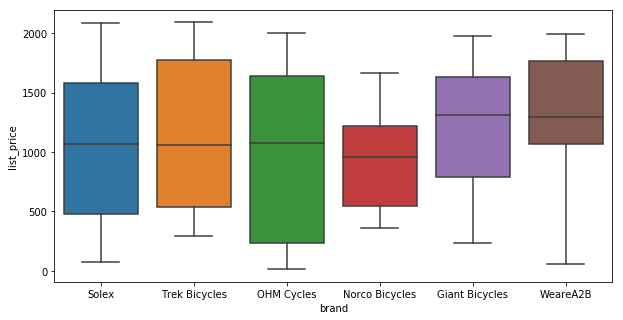

In [30]:
plt.figure(figsize=(10,5)) 
sns.boxplot(x='brand',y='list_price',data=clean_tansaction)

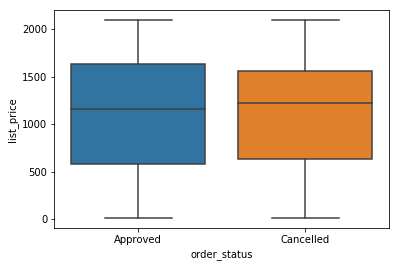

In [26]:
sns.boxplot(x='order_status',y='list_price',data=clean_tansaction)

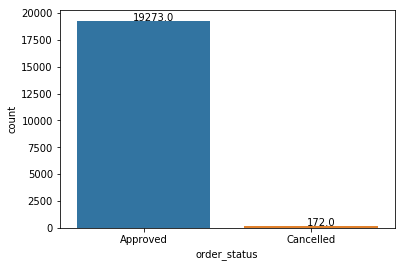

In [26]:
splot=sns.countplot(x='order_status',data=clean_tansaction)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (10, 3),  
                   textcoords = 'offset points')

Text(0, 0.5, 'Number of Customers')

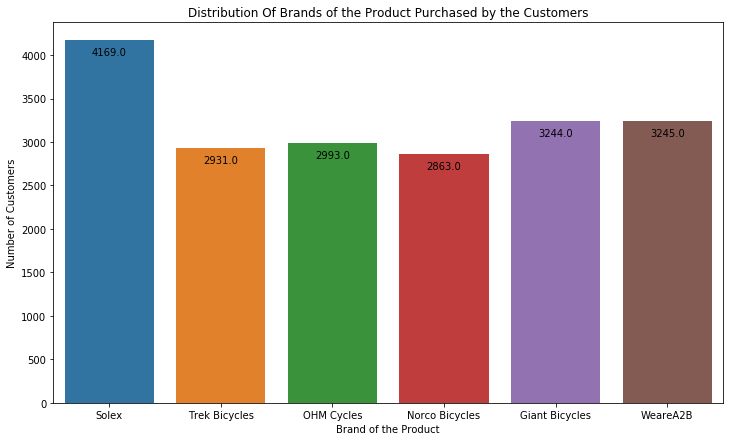

In [42]:
plt.figure(figsize=(12,7))
splot=sns.countplot(x='brand',data=clean_tansaction)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -12),  
                   textcoords = 'offset points')
plt.title('Distribution Of Brands of the Product Purchased by the Customers')
plt.xlabel('Brand of the Product')
plt.ylabel('Number of Customers')

Text(0.5, 1.0, 'Product Line')

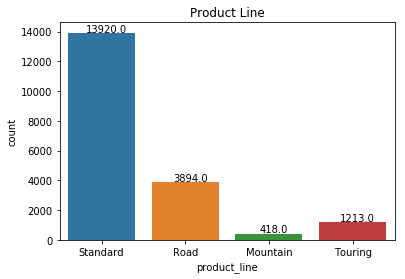

In [28]:
splot=sns.countplot(x='product_line',data=clean_tansaction)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (5, 4),  
                   textcoords = 'offset points')
plt.title('Product Line')

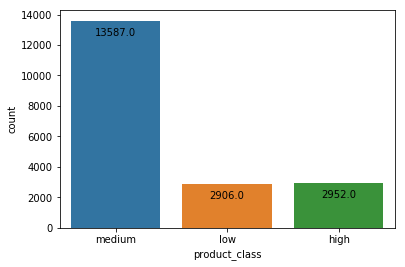

In [29]:
splot=sns.countplot(x='product_class',data=clean_tansaction)


## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -12),  
                   textcoords = 'offset points')

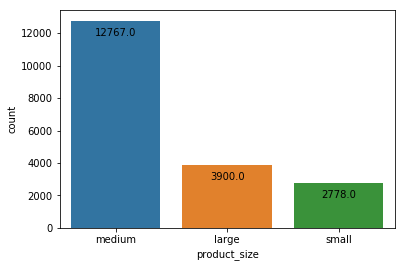

In [30]:
splot=sns.countplot(x='product_size',data=clean_tansaction)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -12),  
                   textcoords = 'offset points')

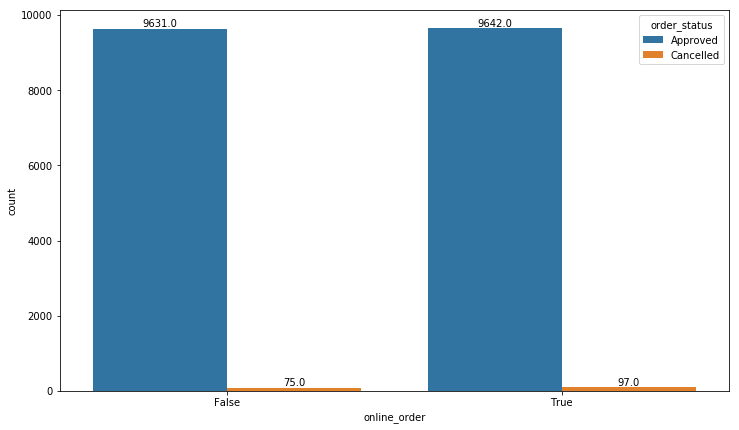

In [31]:
plt.figure(figsize=(12,7))
splot=sns.countplot(x='online_order',hue='order_status',data=clean_tansaction)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, 5),  
                   textcoords = 'offset points')

Text(0.5, 1.0, 'Brand of Purchase for High Valued Product')

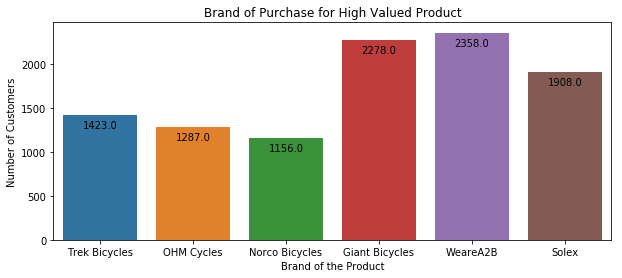

In [52]:
plt.figure(figsize=(10,4))
splot=sns.countplot(x='brand',data=High_valued_product)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')
plt.xlabel('Brand of the Product')
plt.ylabel('Number of Customers')
plt.title('Brand of Purchase for High Valued Product')

Text(0.5, 1.0, 'Brand of Purchase for Low Valued Product')

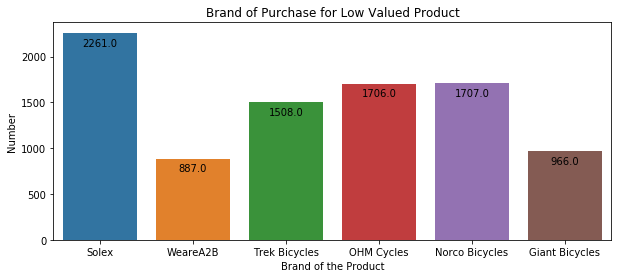

In [51]:
plt.figure(figsize=(10,4))
splot=sns.countplot(x='brand',data=Low_valued_product)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')
    
plt.xlabel('Brand of the Product')
plt.ylabel('Number')
plt.title('Brand of Purchase for Low Valued Product')

Text(0.5, 1.0, 'Product Class for Low Valued Product')

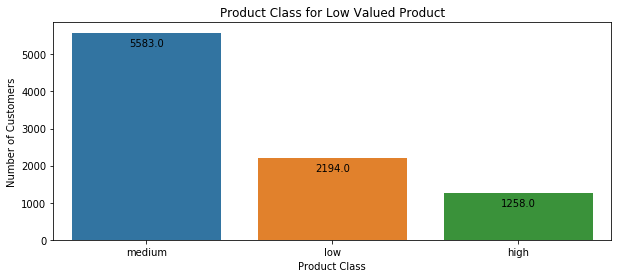

In [53]:
plt.figure(figsize=(10,4))
splot=sns.countplot(x='product_class',data=Low_valued_product)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')
    
plt.xlabel('Product Class')
plt.ylabel('Number of Customers')
plt.title('Product Class for Low Valued Product')

Text(0.5, 1.0, 'Product Class for High Valued Product')

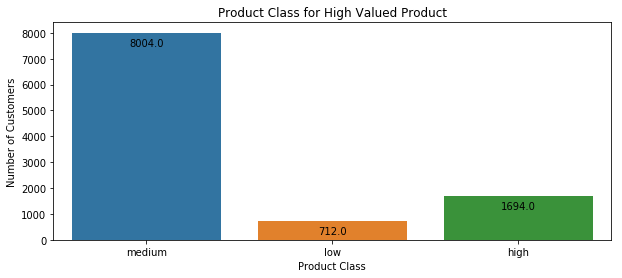

In [54]:
plt.figure(figsize=(10,4))
splot=sns.countplot(x='product_class',data=High_valued_product)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')
    
plt.xlabel('Product Class')
plt.ylabel('Number of Customers')
plt.title('Product Class for High Valued Product')

In [26]:
#clean_tansaction['standard_cost'].head()
#Standard_cost=clean_tansaction['standard_cost']. str.extract('(\d+)')
#Standard_cost.head()

0     $53.62
1    $388.92
2    $248.82
3    $381.10
4    $709.48
Name: standard_cost, dtype: object

In [20]:
clean_tansaction['Profit']=clean_tansaction['list_price']-clean_tansaction['standard_cost']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    19445.000000
mean       551.751933
std        493.211843
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: Profit, dtype: float64

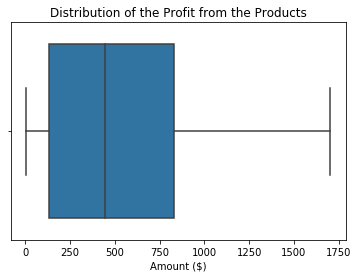

In [21]:
sns.boxplot(x=clean_tansaction['Profit'])
plt.title('Distribution of the Profit from the Products')
plt.xlabel('Amount ($)')
clean_tansaction['Profit'].describe()

Text(0.5, 0, 'Brand of the Product')

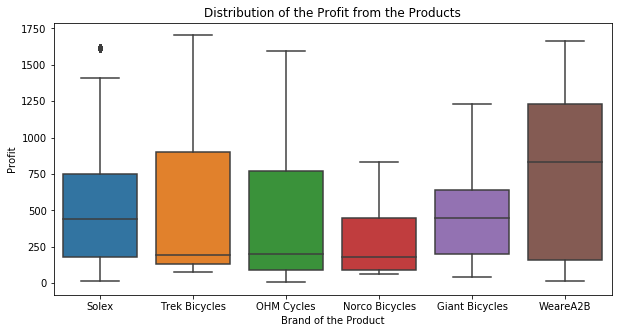

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Profit',x='brand',data=clean_tansaction)
plt.title('Distribution of the Profit from the Products')
plt.xlabel('Brand of the Product')

In [22]:
profit_Category=pd.cut(clean_tansaction['Profit'],bins=[0,400,1710],labels=['Low Profit','High Profit'])

Text(0.5, 1.0, 'Distribution of Brands of the Product by Profit Category')

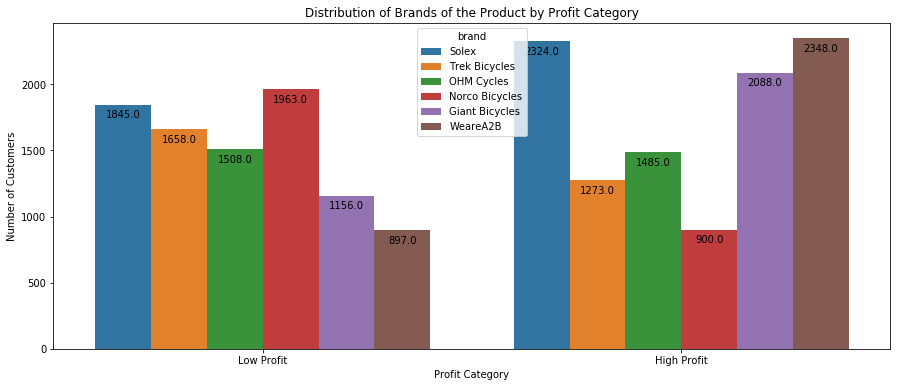

In [70]:
plt.figure(figsize=(15,6))
splot=sns.countplot(x=profit_Category,hue='brand',data=clean_tansaction)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')
    
plt.xlabel('Profit Category')
plt.ylabel('Number of Customers')
plt.title('Distribution of Brands of the Product by Profit Category')

count    19445.000000
mean      1107.337193
std        582.662400
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

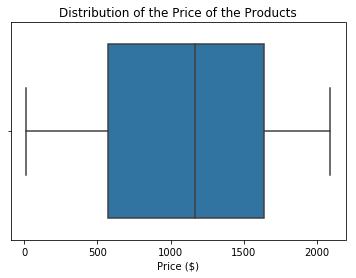

In [213]:
sns.boxplot(x=clean_tansaction['list_price'])
plt.title('Distribution of the Price of the Products')
plt.xlabel('Price ($)')
clean_tansaction['list_price'].describe()

In [30]:
clean_tansaction.to_excel('exported transansaction.xlsx',header=True,index=False)

### New Customer List

In [34]:
Clean_New_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,address,postcode,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,country,property_valuation
0,Chickie,Brister,Male,86,45 Shopko Center,4500,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,QLD,Australia,6.0
1,Morly,Genery,Male,69,14 Mccormick Park,2113,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,NSW,Australia,11.0
2,Ardelis,Forrester,Female,10,5 Colorado Crossing,3505,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,VIC,Australia,5.0
3,Lucine,Stutt,Female,64,207 Annamark Plaza,4814,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,QLD,Australia,1.0
4,Melinda,Hadlee,Female,34,115 Montana Place,2093,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,NSW,Australia,9.0


Text(0, 0.5, 'Number')

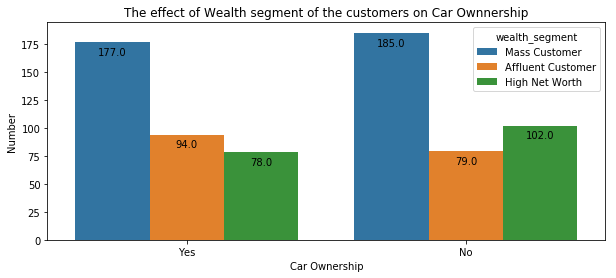

In [146]:
plt.figure(figsize=(10,4))
splot=sns.countplot(hue='wealth_segment',x='owns_car',data=Clean_New_customers)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')
    
plt.title('The effect of Wealth segment of the customers on Car Ownnership')
plt.xlabel('Car Ownership')
plt.ylabel('Number')

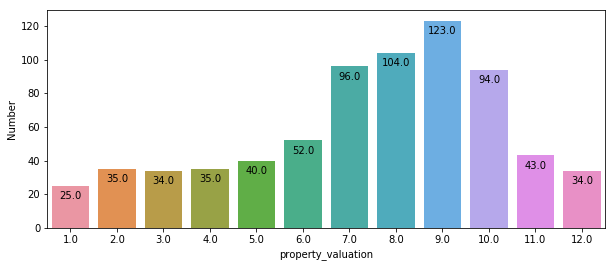

In [35]:
plt.figure(figsize=(10,4))
splot=sns.countplot(x='property_valuation',data=Clean_New_customers)
plt.ylabel('Number')

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')

count    715.000000
mean       7.386014
std        2.830274
min        1.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       12.000000
Name: property_valuation, dtype: float64

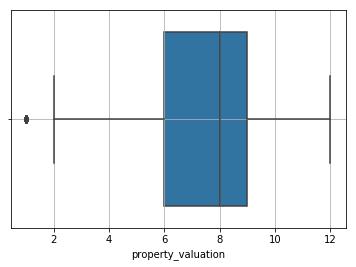

In [37]:
sns.boxplot(x='property_valuation', data=Clean_New_customers)
plt.grid()
Clean_New_customers.property_valuation.describe()

In [41]:
Low=Clean_New_customers['property_valuation']<7 
Low_valued_pric=Clean_New_customers[Low]

High=Clean_New_customers['property_valuation']>=7
High_valued_pric=Clean_New_customers[High]


In [183]:
spearmanr(Clean_New_customers['property_valuation'],Clean_New_customers['tenure'])

SpearmanrResult(correlation=-0.0209673095535853, pvalue=0.5756597858569393)

In [187]:
spearmanr(Clean_New_customers['property_valuation'],Clean_New_customers['Age'])

SpearmanrResult(correlation=-0.03914992266092302, pvalue=0.29582986421135304)

In [190]:
spearmanr(Clean_New_customers['tenure'],Clean_New_customers['Age'])

SpearmanrResult(correlation=0.3172291423025077, pvalue=3.52285198745135e-18)

In [191]:
spearmanr(Clean_New_customers['tenure'],Clean_New_customers['property_valuation'])

SpearmanrResult(correlation=-0.0209673095535853, pvalue=0.5756597858569393)

In [193]:
spearmanr(Clean_New_customers['property_valuation'],Clean_New_customers['past_3_years_bike_related_purchases'])

SpearmanrResult(correlation=0.0040606565239547174, pvalue=0.9136860723892919)

In [33]:
Clean_New_customers.to_excel('exported New Customers.xlsx',header=True,index=False)

In [196]:
  address.head()

,customer_id,postcode,property_valuation,state,country,address
0,1,2016,10,New South Wales,Australia,060 Morning Avenue
1,2,2153,10,New South Wales,Australia,6 Meadow Vale Court
2,4,4211,9,QLD,Australia,0 Holy Cross Court
3,5,2448,4,New South Wales,Australia,17979 Del Mar Point
4,6,3216,9,VIC,Australia,9 Oakridge Court


Text(0, 0.5, 'Number of Customers')

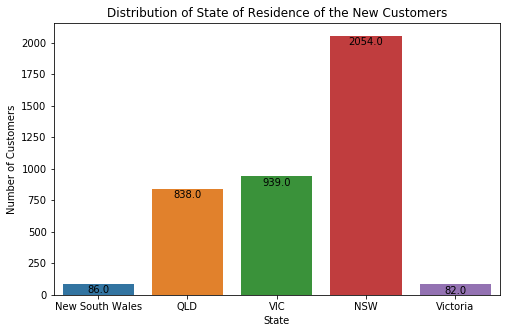

In [207]:
plt.figure(figsize=(8,5))
splot=sns.countplot(x='state',data=address)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -6),  
                   textcoords = 'offset points')
    
plt.title('Distribution of State of Residence of the New Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')

In [32]:
address.to_excel('exported address.xlsx',header=True,index=False)

# Exploring the variables and making it Fit for Logistics Regression Model

Dependent Variable = Profit_Category



Independent variables are: (1) clean_customers_demo

past_3_years_bike_related_purchases 

wealth_segment 	

owns_car 	

tenure 

Age_cat

                           (2)clean_tansaction
online_order

order_status 

product_line 

product_class 	

product_size 

brand

list_price 

standard_price

In [24]:
Brand_of_product=pd.get_dummies(clean_tansaction['brand'])
del Brand_of_product['Giant Bicycles']
del Brand_of_product['WeareA2B']
del Brand_of_product['OHM Cycles']
del Brand_of_product['Norco Bicycles']
#Brand_of_product

In [27]:
Age_cat=clean_customers_demo.Age_Category.dropna()
age_category=pd.get_dummies(Age_cat)
del age_category['Old_Age']
#age_category

In [29]:
wealth_segment=pd.get_dummies(clean_customers_demo['wealth_segment'])
#del wealth_segment['High Net Worth']
#wealth_segment 

In [30]:
Owns_car=pd.get_dummies(clean_customers_demo['owns_car'])
#Owns_car 

In [31]:
Online_order=pd.get_dummies(clean_tansaction['online_order'])
#Online_order

In [32]:
Order_status =pd.get_dummies(clean_tansaction['order_status'])
#Order_status 

In [33]:
Product_line =pd.get_dummies(clean_tansaction['product_line'])
del Product_line['Mountain']
del Product_line['Touring']
#Product_line 

In [34]:
Product_class  =pd.get_dummies(clean_tansaction['product_class'])
del Product_class['low']
#Product_class  

In [35]:
Product_size =pd.get_dummies(clean_tansaction['product_size'])
del Product_size ['small']
#Product_size  

In [36]:
profit_Category=pd.cut(clean_tansaction['Profit'],bins=[0,400,1710],labels=['Low Profit','High Profit'])
Profit_Category =pd.get_dummies(profit_Category)
#Profit_Category

In [37]:
bike_purchase_Category=pd.cut(clean_customers_demo['past_3_years_bike_related_purchases'],bins=[0,50,100],labels=['Low Bike Purchase','High Bike Purchase'])
Bike_purchase_Category =pd.get_dummies(bike_purchase_Category)
#Bike_purchase_Category

In [38]:
tenure_Category=pd.cut(clean_customers_demo['tenure'],bins=[0,10,22],labels=['Recent Tenure','Old tenure'])
Tenure_Category =pd.get_dummies(tenure_Category)
#Tenure_Category

In [39]:
price_Category=pd.cut(clean_tansaction['list_price'],bins=[0,1107,2092],labels=['High Price','Low Price'])
Price_Category =pd.get_dummies(price_Category)
del Price_Category['Low Price']
#Price_Category

In [40]:
cost_Category=pd.cut(clean_tansaction['standard_cost'],bins=[0,555,1760],labels=['High Cost','Low Cost'])
Cost_Category =pd.get_dummies(cost_Category)
del Cost_Category['Low Cost']
#Cost_Category

In [41]:
Price=clean_tansaction['list_price']

In [42]:
Cost=clean_tansaction['standard_cost']

# Defining the Training and Testing Data

In [43]:
t=Profit_Category
y=t.drop('Low Profit',axis=1)

In [44]:
i=pd.concat([Cost,Price_Category,Cost_Category,Product_size,Product_class,Product_line,Order_status,Online_order,Brand_of_product],axis=1)
del i['standard_cost']
X=i.dropna()
X.head()

,High Price,High Cost,large,medium,high,medium,Road,Standard,Approved,Cancelled,False,True,Solex,Trek Bicycles
0,1,1,0,1,0,1,0,1,1,0,1,0,1,0
1,0,1,1,0,0,1,0,1,1,0,0,1,0,1
2,0,1,0,1,0,0,0,1,1,0,1,0,0,0
3,0,1,0,1,0,1,0,1,1,0,1,0,0,0
4,0,0,1,0,0,1,0,1,1,0,0,1,0,0


In [ ]:
#X2=pd.concat([Age_cat,Tenure_Category,Bike_purchase_Category,wealth_segment,age_category,Owns_car],axis=1)
#X2.info()

In [45]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
## Scaling the Data Set for better Performance

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """


## Fitting the Model (Logistic Model)

In [47]:
logmodel=LogisticRegression()

In [48]:
logmodel.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Exploring the Fitted Model

In [49]:
predictions=logmodel.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

Text(0.5, 1.0, 'Predicted Profit')

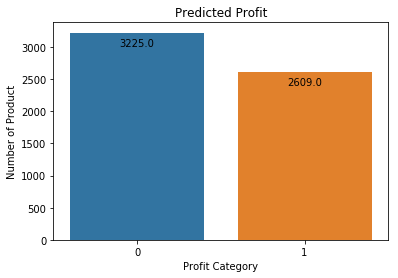

In [50]:
splot=sns.countplot(x=predictions)

## Annotating the Bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                    xytext = (0, -10),  
                   textcoords = 'offset points')
plt.xlabel('Profit Category')
plt.ylabel('Number of Product')
plt.title('Predicted Profit')

In [51]:
confusion_matrix(y_test,predictions)

array([[2684,    0],
       [ 541, 2609]], dtype=int64)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2684
           1       1.00      0.83      0.91      3150

   micro avg       0.91      0.91      0.91      5834
   macro avg       0.92      0.91      0.91      5834
weighted avg       0.92      0.91      0.91      5834



In [53]:
logmodel.coef_

array([[-4.68662820e+00,  1.62570896e-01,  5.39205891e+00,
         6.46033175e+00, -4.74757513e-01, -3.42531434e-01,
         1.09749267e+00,  1.58241633e+00,  1.32977839e-02,
        -1.32977839e-02,  4.19665859e-04, -4.19665859e-04,
         4.25537473e-02,  1.17816854e-01]])

In [56]:
logmodel.coef_
#Logistic_Model_Coefficient=pd.DataFrame(logmodel.coef_,X_train.columns,columns=['Coefficients'])
#print(Logistic_Model_Coefficient)

array([[-4.68662820e+00,  1.62570896e-01,  5.39205891e+00,
         6.46033175e+00, -4.74757513e-01, -3.42531434e-01,
         1.09749267e+00,  1.58241633e+00,  1.32977839e-02,
        -1.32977839e-02,  4.19665859e-04, -4.19665859e-04,
         4.25537473e-02,  1.17816854e-01]])

## Checking How perfect the prediction is

In [64]:
confusion_matrix(y_test,predictions)

array([[2683,    1],
       [   0, 3150]], dtype=int64)

Low Profit = No

High Profit= Yes

      n=7778           Predicted No               Predicted Yes       Total
                
     Actual No       TN = 3552                      FP = 1          3553
 
     Actual Yes      FN = 0                         TP = 4225       4225
     
     Total             3552                           4226
     
    TN = True negative, FP = False Positive(Type I error),   FN = False Positive(Type II erro),   TP = True Positive

#### Accuracy
Overall, how often is the prediction correct?

    (TP + TN)/Total = (3404 + 3553)/7778 = 0.894 = 89%
#### Misclassification Rate(Error Rate)
Overall, how often is the prediction wrong?

    (FN + FP)/Total = (821+ 0)/7778 = 0.105 = 11%

In [47]:
accuracy_score(y_test,predictions)
#accuracy_score(y_test,predictions)*100

0.8964689749742887